# Duration-based

In [1]:
# a DEMO FOR basic duration-based  RHYTHM ANALYSIS.
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
from scipy import signal
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('seaborn-muted')
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

In [2]:
x, sr = librosa.load('audio/jp.wav')
#使用 ipython 播放音频；
ipd.Audio(x, rate=sr)


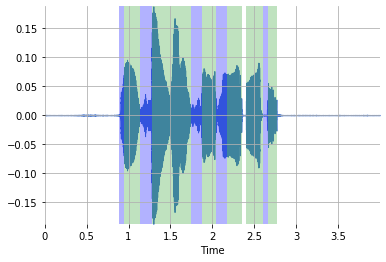

In [3]:
 # get duration start time _ end time based on annotation or automatic c/v classifcation
start_c = [0.88,1.14,1.74,2.05,2.6] 
end_c = [0.94,1.28,1.88,2.17,2.66]

start_v = [0.94,1.28,1.52,1.88,2.17,2.4,2.66]
end_v = [1.14,1.52,1.74,2.05,2.35,2.60,2.77]

duration_c = [end_c[i]-start_c[i] for i in range(len(start_c))]
duration_v = [end_v[i]-start_v[i] for i in range(len(start_v))]

librosa.display.waveplot(x, sr=sr)
for i in range(len(start_c)):
    plt.axvspan(start_c[i], end_c[i], facecolor='b', alpha=0.3)
for i in range(len(start_v)):
    plt.axvspan(start_v[i], end_v[i], facecolor='#2ca02c', alpha=0.3)       
# classification of  consontant and vowel / based on annotation or automatic 

plt.show()

In [4]:
import random
import numpy as np
import statistics 

# IM metrics or PVI value calculated

# percent Voalic 元音百分比

duratin_all = sum(duration_v) + sum(duration_c)# 获取总时长；
duration_voalic_1 = sum(duration_v) # 获取元音时长；
duration_voalic_2 = 0.8


PectV_1 = duration_voalic_1/duratin_all # %V = 元音时长 / 总时长； 
PectV_2 = duration_voalic_2/duratin_all

# delta V C 元辅音标准差


V_all_r1 = np.array([random.random() for i in range(10)])
V_all_r2 = np.array([random.uniform(0,1) for i in range(10)]) # random一些 时长 0s 1s 之间

deltav1 = round(statistics.stdev(duration_v),3)
deltav2 = round(statistics.stdev(V_all_r2),3)

C_all_r1 = np.array([random.random() for i in range(10)])
C_all_r2 = np.array([random.uniform(0,0.5) for i in range(10)]) # random 一些 时长 0 - 0.5s 之间

deltaC1 = round(statistics.stdev(duration_c),3)
deltaC2 = round(statistics.stdev(C_all_r2),3)

#deltaC1 = round(statistics.stdev(C_all_r1),3)


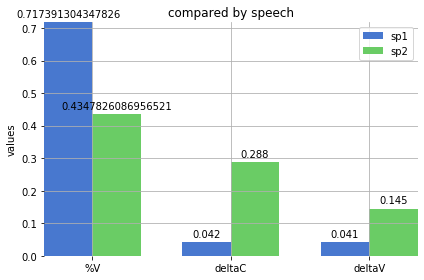

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['%V','deltaC','deltaV']
speech1 = [PectV_1,deltav1,deltaC1]
speech2 = [PectV_2,deltav2,deltaC2]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, speech1, width, label='sp1')
rects2 = ax.bar(x + width/2, speech2, width, label='sp2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('values')
ax.set_title('compared by speech')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

## 基于此 方法发表的论文： 

In [ ]:
## more duration - based method. 
# 时长的可预测性； 节奏 >> 可压缩性 ？ 可预测性？ 

# 作者 提供的 三种方法 ， KS test ；  ratio >> 针对的 是 distribution of the logarithms of the ratio of adjacent INIs 计算 mean 方差；